In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('LFB.csv')

In [2]:
df.info()
# description of numerical attributes as according to python
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11529 entries, 0 to 11528
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          11529 non-null  object 
 1   DateOfCall                              11529 non-null  object 
 2   CalYear                                 11529 non-null  int64  
 3   TimeOfCall                              11529 non-null  object 
 4   HourOfCall                              11529 non-null  int64  
 5   IncidentGroup                           11529 non-null  object 
 6   StopCodeDescription                     11529 non-null  object 
 7   SpecialServiceType                      3433 non-null   object 
 8   PropertyCategory                        11529 non-null  object 
 9   PropertyType                            11529 non-null  object 
 10  AddressQualifier                        11529 non-null  ob

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,11529.000000,11529.000000,1.152900e+04,1.152900e+04,6220.000000,6220.000000,11529.000000,11529.000000,6220.000000,6220.000000,11016.000000,4202.000000,11397.000000,11397.000000,11445.000000,11442.000000,11442.000000,11529.000000
mean,2020.544193,13.592246,4.328401e+10,2.191433e+07,514061.501447,175912.918006,514324.568479,175957.841096,51.263767,-0.357752,330.748820,409.217515,1.303062,1.509081,1.579030,1.467838,512.275214,1.413826
std,1.132516,6.257072,6.087970e+10,5.699337e+06,3648.621671,2153.202360,3603.877638,2066.603333,3.256882,0.057593,141.550436,161.599485,0.634175,0.810617,1.295536,3.777653,1326.918155,1.859402
min,2019.000000,0.000000,0.000000e+00,2.060080e+07,507041.000000,170475.000000,507050.000000,170450.000000,0.000000,-0.460986,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,2020.000000,10.000000,0.000000e+00,2.150054e+07,510916.000000,174325.250000,511250.000000,174550.000000,51.456218,-0.404574,244.000000,308.000000,1.000000,1.000000,1.000000,1.000000,346.000000,1.000000
50%,2021.000000,14.000000,1.001528e+10,2.150098e+07,513323.000000,176196.000000,513550.000000,176150.000000,51.472996,-0.369418,315.500000,381.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,2022.000000,19.000000,1.000220e+11,2.150141e+07,516535.250000,177909.250000,517150.000000,177850.000000,51.487922,-0.321761,394.000000,481.000000,1.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,2022.000000,23.000000,2.000040e+11,9.999011e+07,522187.000000,179596.000000,522150.000000,179550.000000,51.502697,0.000000,1199.000000,1199.000000,8.000000,8.000000,47.000000,182.000000,66248.000000,70.000000


#### Identify columns to drop and list for ease of use later

In [3]:
cols_to_drop = ["IncidentNumber", 
                "CalYear",
                "TimeOfCall",
                "Postcode_full", "Postcode_district",
                "UPRN", "USRN",
                "IncGeo_BoroughCode", "IncGeo_BoroughName", "ProperCase", 
                "IncGeo_WardCode", "IncGeo_WardName",
                "Easting_m", "Northing_m","Latitude", "Longitude",
                "FRS",  
                ]

df_reduced = df.drop(cols_to_drop, axis=1)
df_reduced.head()

,DateOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,IncGeo_WardNameNew,Easting_rounded,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,01 Jan 2019,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,In street outside gazetteer location,Brentford West,517750,...,362.0,Chiswick,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
1,01 Jan 2019,1,Fire,Secondary Fire,NaN,Outdoor Structure,Wheelie bin (domestic size),Nearby address - no building in street,Cranford,510850,...,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
2,01 Jan 2019,1,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),On land associated with building,Syon & Brentford Lock,516250,...,209.0,Heston,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
3,01 Jan 2019,6,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,Chiswick Gunnersbury,520750,...,212.0,Chiswick,430.0,Acton,2.0,2.0,2.0,1.0,333.0,1
4,01 Jan 2019,6,Fire,Primary Fire,NaN,Road Vehicle,Minibus,In street outside gazetteer location,Hanworth Village,512250,...,113.0,Twickenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2


In [4]:
df_categorical = df_reduced.drop(["FirstPumpArriving_AttendanceTime", "SecondPumpArriving_AttendanceTime", 
                                  "NumStationsWithPumpsAttending", "NumPumpsAttending", 
                                  "PumpCount", "PumpHoursRoundUp", 
                                  "Notional Cost (£)", "NumCalls"], axis=1)

# categorical_columns= ["DateOfCall",
# "IncidentGroup",
# "StopCodeDescription",
# "SpecialServiceType",
# "PropertyCategory",
# "PropertyType",
# "AddressQualifier",
# "Postcode_full",
# "IncGeo_WardNameNew",
# "IncidentStationGround",
# "FirstPumpArriving_DeployedFromStation",
# "SecondPumpArriving_DeployedFromStation"]

## Numerical Data

In [5]:
df_numerical = df_reduced[["Easting_rounded", "Northing_rounded", #  are these numerical?
                           "FirstPumpArriving_AttendanceTime",
                           "SecondPumpArriving_AttendanceTime", "NumStationsWithPumpsAttending",
                           "NumPumpsAttending", "PumpCount", "PumpHoursRoundUp", 
                           "Notional Cost (£)", "NumCalls"]].copy()

df_numerical.head()
df_numerical.describe()

,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,11529.000000,11529.000000,11016.000000,4202.000000,11397.000000,11397.000000,11445.000000,11442.000000,11442.000000,11529.000000
mean,514324.568479,175957.841096,330.748820,409.217515,1.303062,1.509081,1.579030,1.467838,512.275214,1.413826
std,3603.877638,2066.603333,141.550436,161.599485,0.634175,0.810617,1.295536,3.777653,1326.918155,1.859402
min,507050.000000,170450.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,511250.000000,174550.000000,244.000000,308.000000,1.000000,1.000000,1.000000,1.000000,346.000000,1.000000
50%,513550.000000,176150.000000,315.500000,381.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,517150.000000,177850.000000,394.000000,481.000000,1.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,522150.000000,179550.000000,1199.000000,1199.000000,8.000000,8.000000,47.000000,182.000000,66248.000000,70.000000


In [6]:
# kurtosis for numerical columns

# High kurtosis in a data set is an indicator that data has heavy outliers.
# Low kurtosis in a data set is an indicator that data has lack of outliers.

df_numerical.kurt().to_frame()
# note that .to_frame() is used to add some formatting to make cutting and pasting the values into a report easier.

,0
Easting_rounded,-0.920705
Northing_rounded,-0.855383
FirstPumpArriving_AttendanceTime,4.333743
SecondPumpArriving_AttendanceTime,3.554422
NumStationsWithPumpsAttending,10.429178
NumPumpsAttending,7.152546
PumpCount,337.846755
PumpHoursRoundUp,1114.559107
Notional Cost (£),1145.597869
NumCalls,325.039580


In [7]:
# skewness for each column

# between -0.5 and 0.5, the data are fairly symmetrical
# between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
# less than -1 or greater than 1, the data are highly skewed

df_numerical.skew().to_frame()

,0
Easting_rounded,0.388009
Northing_rounded,-0.458202
FirstPumpArriving_AttendanceTime,1.290816
SecondPumpArriving_AttendanceTime,1.374992
NumStationsWithPumpsAttending,2.785822
NumPumpsAttending,2.316635
PumpCount,13.085507
PumpHoursRoundUp,29.420163
Notional Cost (£),29.767081
NumCalls,14.326892


In [8]:
# median for each column
df_numerical.median().to_frame()

,0
Easting_rounded,513550.0
Northing_rounded,176150.0
FirstPumpArriving_AttendanceTime,315.5
SecondPumpArriving_AttendanceTime,381.0
NumStationsWithPumpsAttending,1.0
NumPumpsAttending,1.0
PumpCount,1.0
PumpHoursRoundUp,1.0
Notional Cost (£),352.0
NumCalls,1.0


In [9]:
# mode for each column
df_numerical.mode()

,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,519450.0,178050.0,313.0,318.0,1.0,1.0,1.0,1.0,352.0,1.0
1,NaN,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

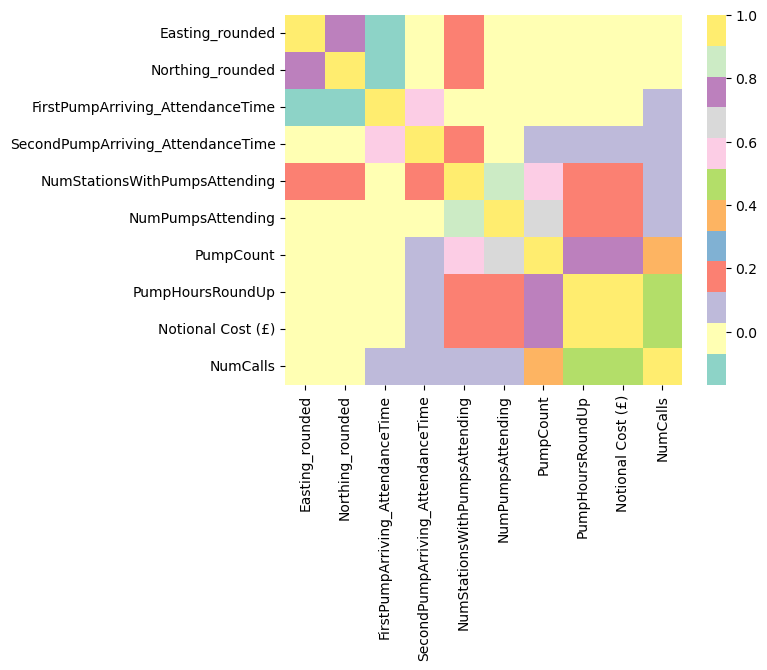

In [10]:
corr = df_numerical.corr()
sns.heatmap(corr, cmap="Set3")

#### Null count

In [11]:
df_reduced.isnull().sum()

DateOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        8096
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
IncGeo_WardNameNew                           0
Easting_rounded                              0
Northing_rounded                             0
IncidentStationGround                        0
FirstPumpArriving_AttendanceTime           513
FirstPumpArriving_DeployedFromStation      513
SecondPumpArriving_AttendanceTime         7327
SecondPumpArriving_DeployedFromStation    7327
NumStationsWithPumpsAttending              132
NumPumpsAttending                          132
PumpCount                                   84
PumpHoursRoundUp                            87
Notional Cost (£)                           87
NumCalls     

#### Plotting (Numerical)

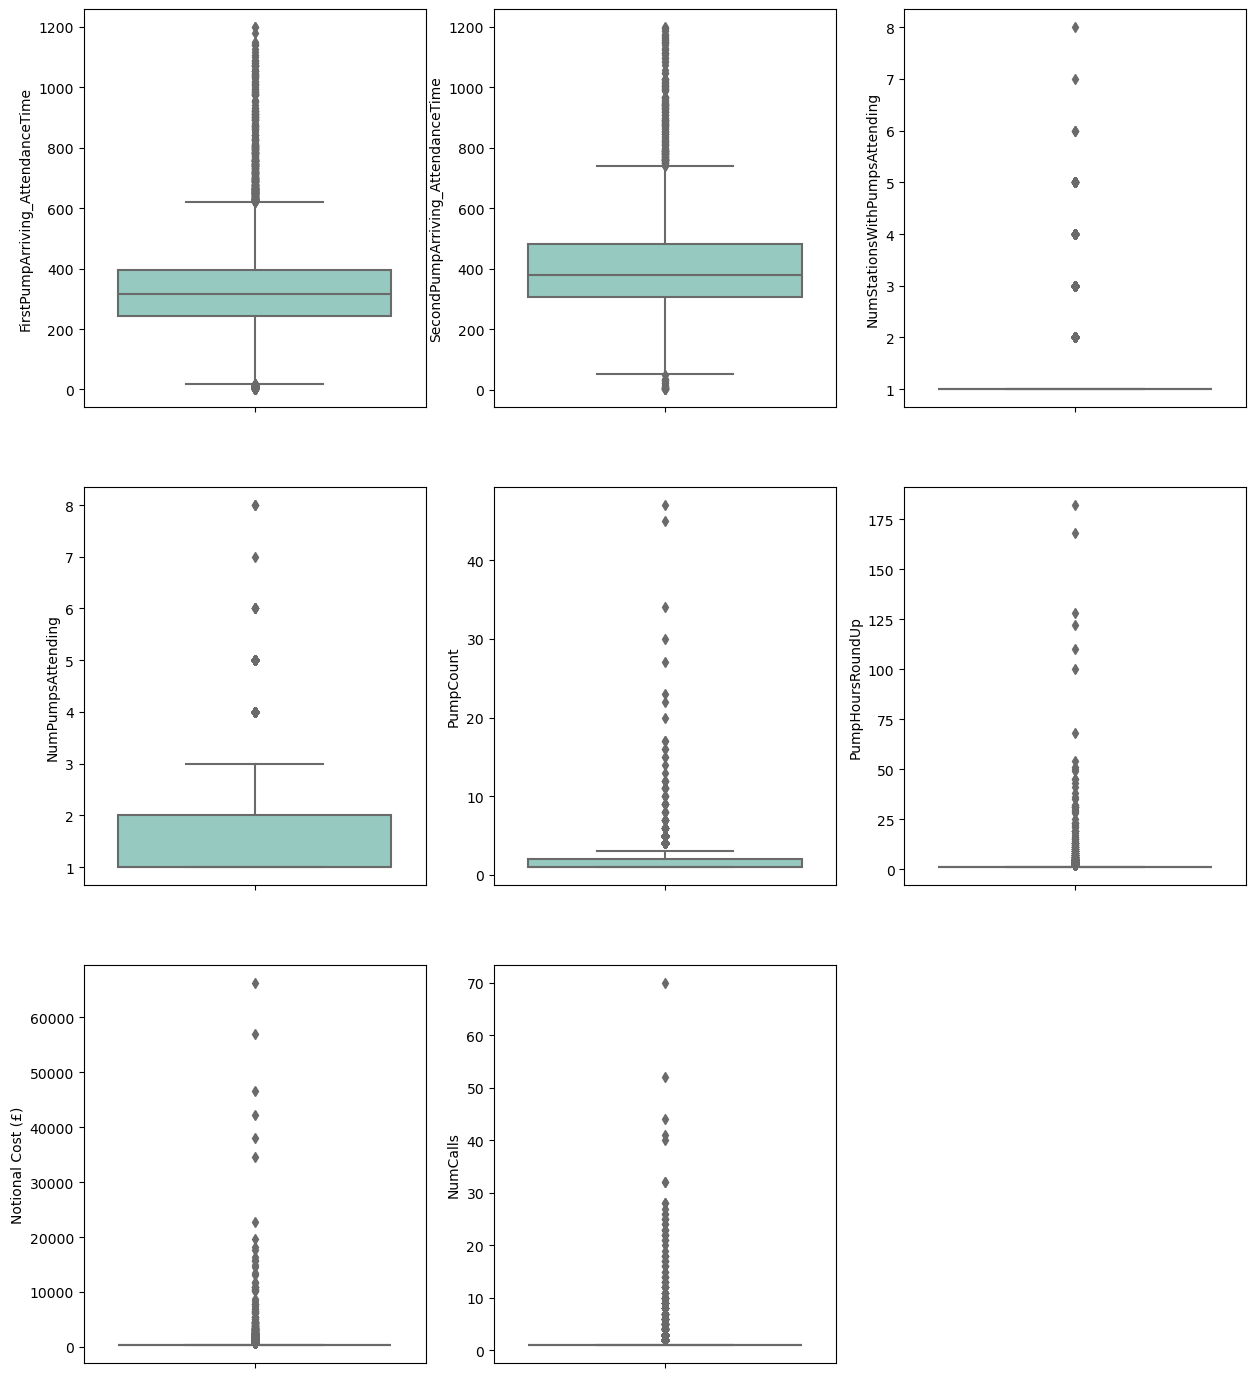

In [12]:
# remove easting and northing values
df_num = df_numerical.drop(["Easting_rounded", "Northing_rounded"], axis=1)

# boxplot for numeric variables
fig = plt.figure(figsize=(15,30))

for i in range(len(df_num.columns)):
    column = df_num.columns[i]
    sub = fig.add_subplot(5,3, i+1)
    chart = sns.boxplot(data=df_num, y=column, palette="Set3")

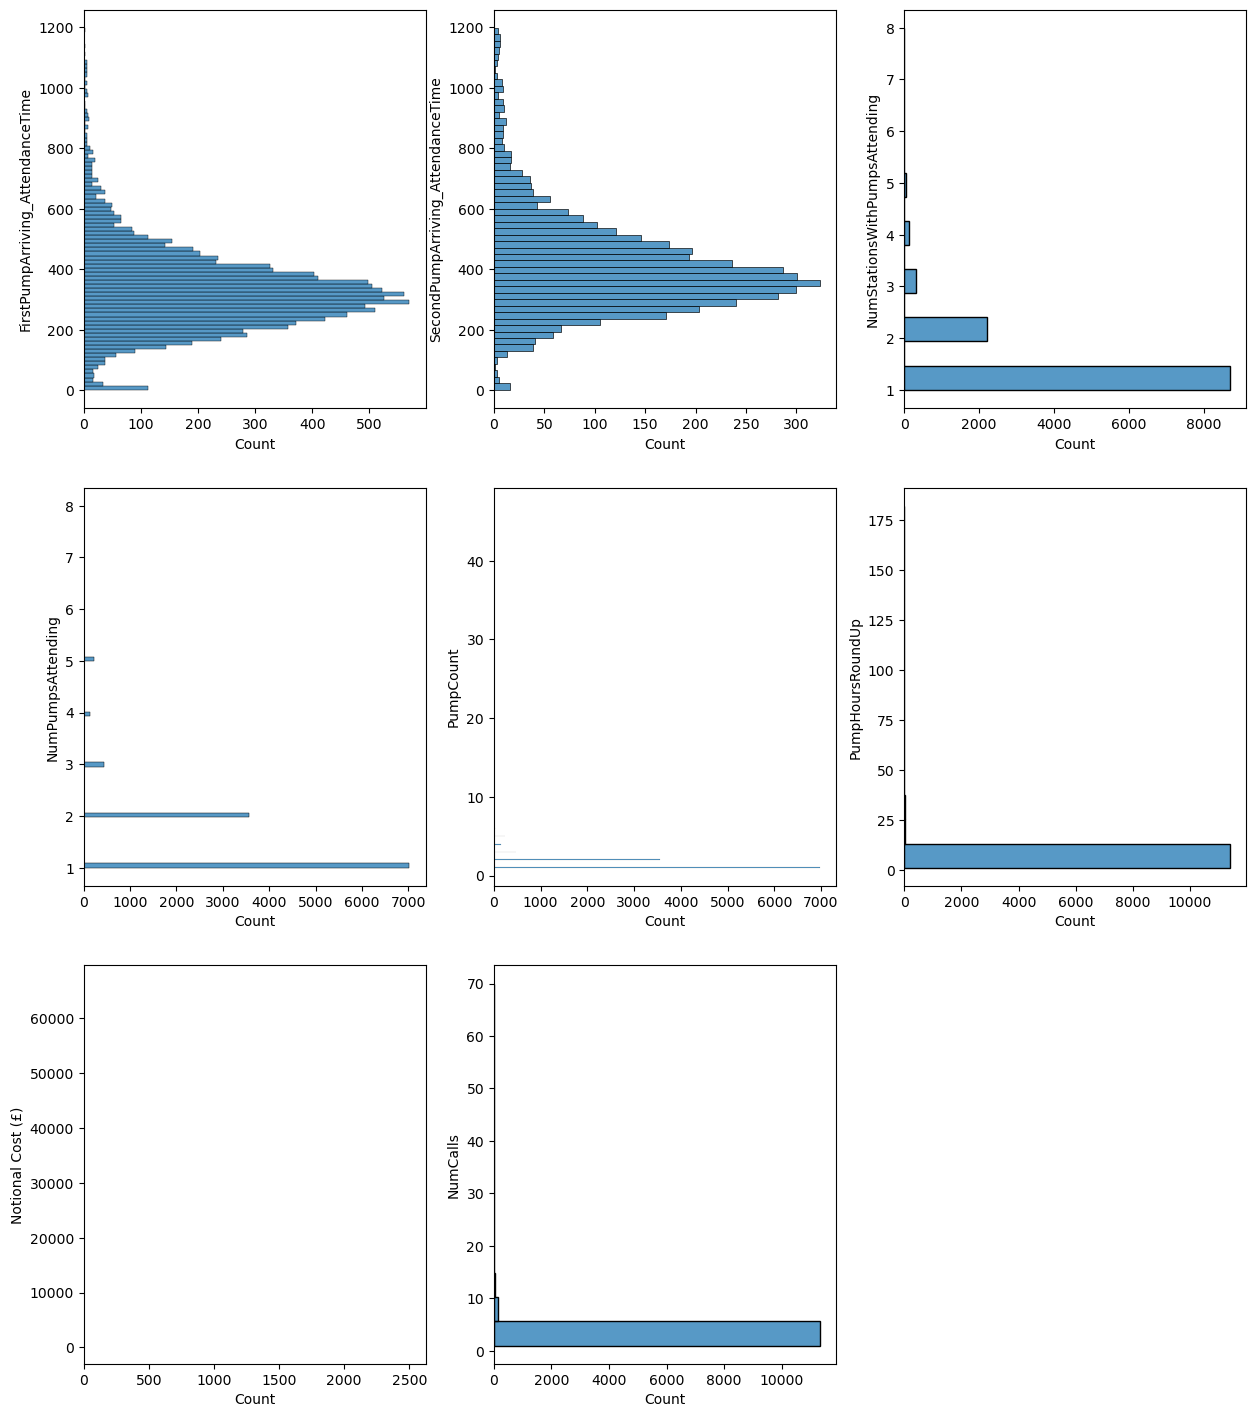

In [13]:
fig = plt.figure(figsize=(15,30))

for i in range(len(df_num.columns)):
    column = df_num.columns[i]
    sub = fig.add_subplot(5,3, i+1)
    chart = sns.histplot(data=df_num, y=column, palette="Set3");

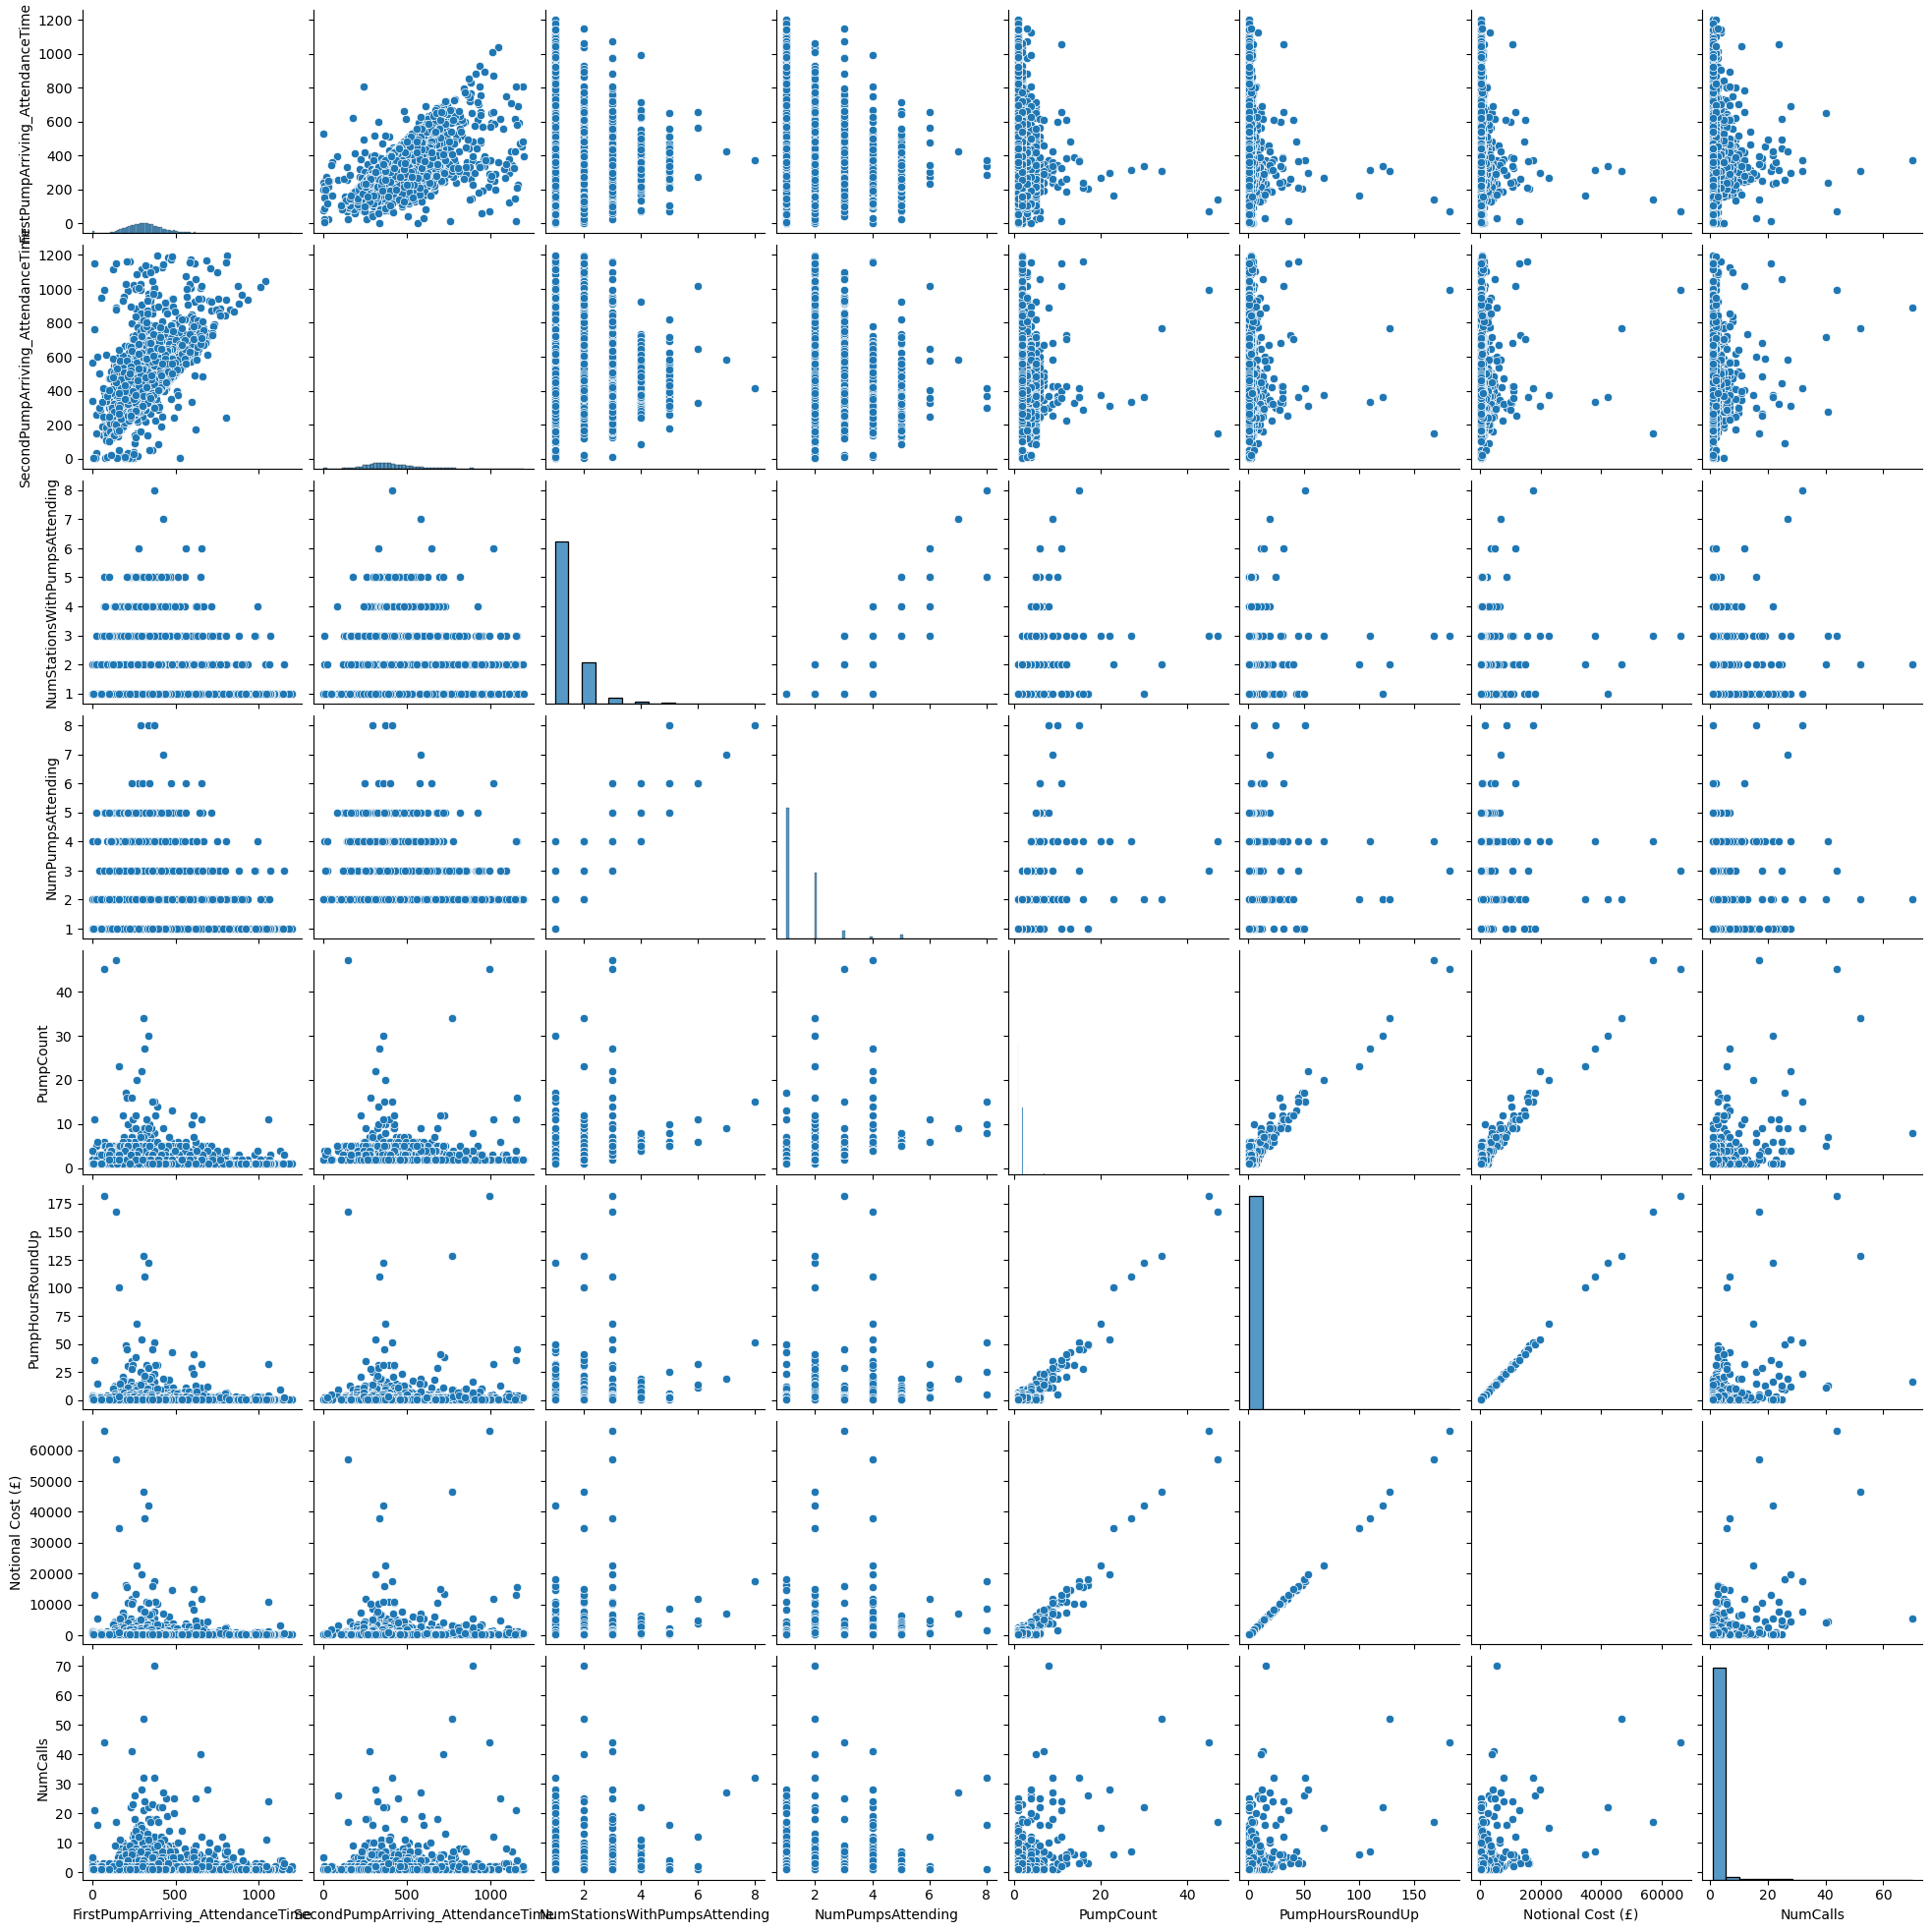

In [14]:
sns.pairplot(df_num)

#### Plotting (Categorical)

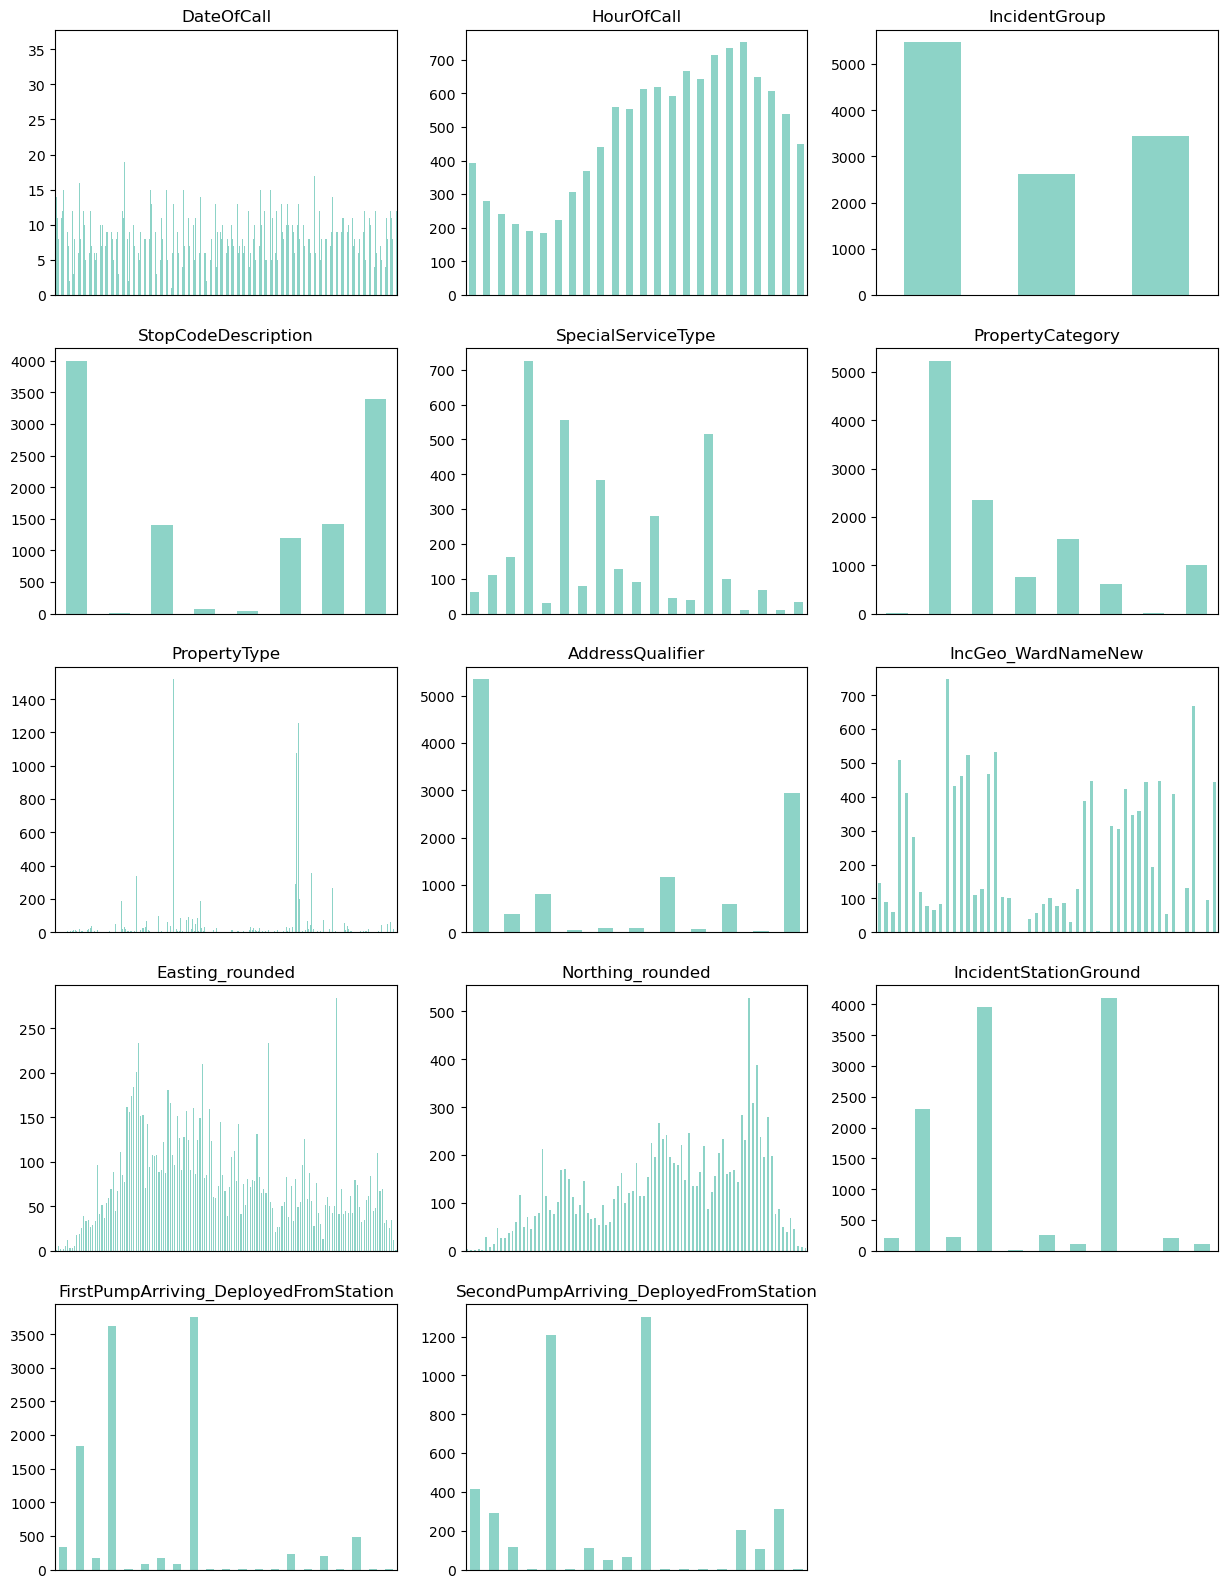

In [15]:
fig = plt.figure(figsize=(15,20))

for i in range(len(df_categorical.columns)):
    column = df_categorical.columns[i]
    sub = fig.add_subplot(5,3, i+1)
    chart = df_categorical[column].value_counts().sort_index(axis=0).plot(kind="bar", cmap="Set3").set_title(column)
    plt.xlabel('') # remove the label
    plt.xticks([]) # remove the ticks
    # Adjust the space between the subplots
    plt.subplots_adjust(wspace=0.2, hspace=0.2)


# Model construction
## 1 – Trends

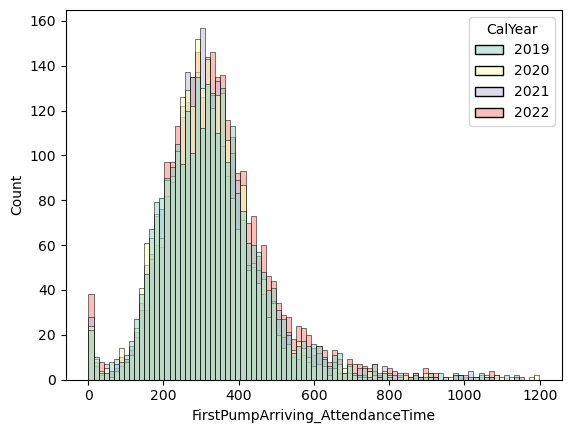

In [16]:
sns.histplot(data=df, x="FirstPumpArriving_AttendanceTime", palette="Set3", hue="CalYear");

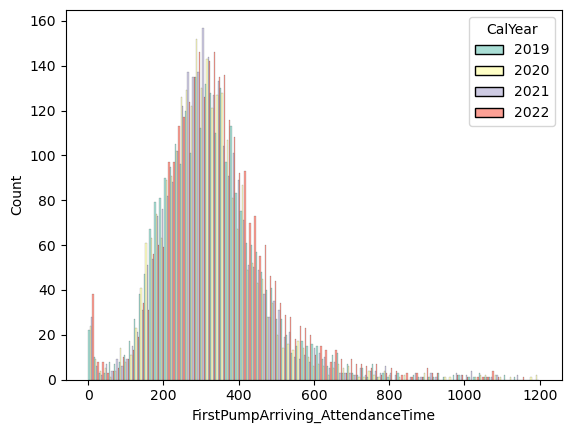

In [17]:
sns.histplot(data=df, x="FirstPumpArriving_AttendanceTime", palette="Set3", hue="CalYear", multiple="dodge");

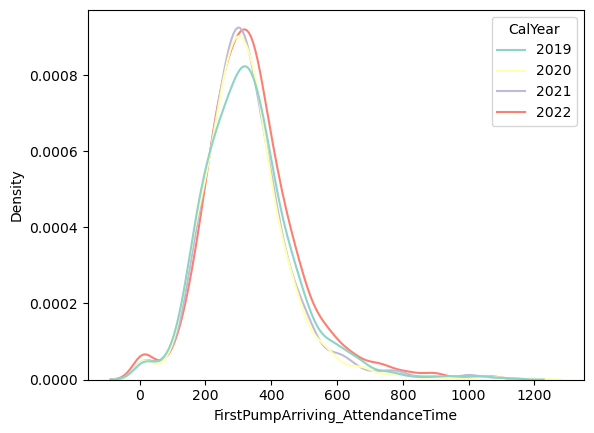

In [18]:
sns.kdeplot(data=df, x="FirstPumpArriving_AttendanceTime", palette="Set3", hue="CalYear");

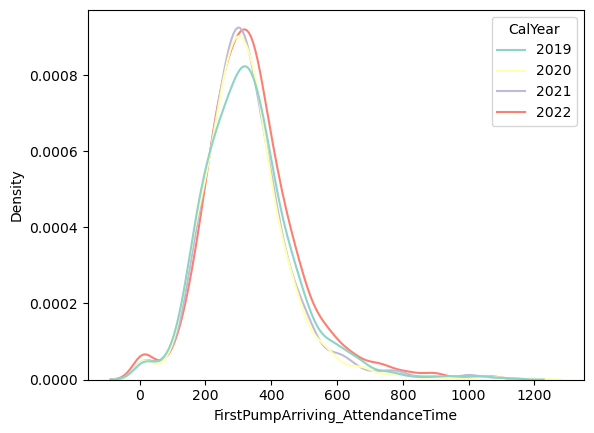

In [19]:
num_cols = ["FirstPumpArriving_AttendanceTime",
                           "SecondPumpArriving_AttendanceTime", "NumStationsWithPumpsAttending",
                           "NumPumpsAttending", "PumpCount", "PumpHoursRoundUp", 
                           "Notional Cost (£)", "NumCalls"]

sns.kdeplot(data=df, x="FirstPumpArriving_AttendanceTime", palette="Set3", hue="CalYear");

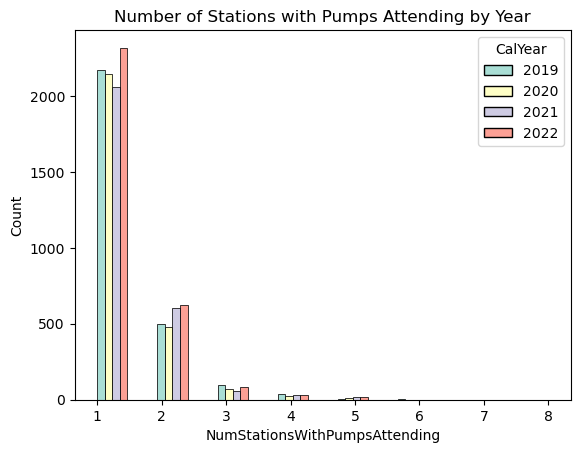

In [20]:
sns.histplot(data=df, x="NumStationsWithPumpsAttending", 
             palette="Set3", hue="CalYear", 
             multiple="dodge").set_title("Number of Stations with Pumps Attending by Year");

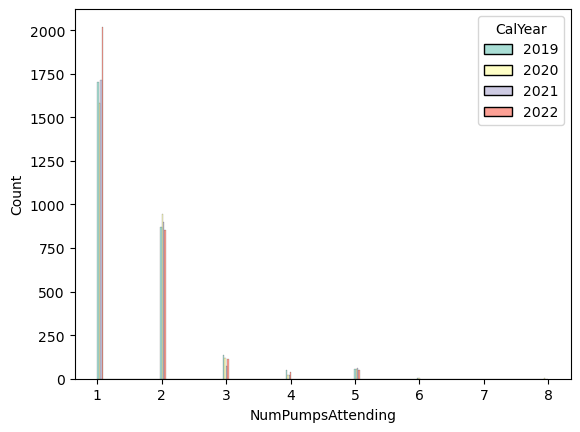

In [21]:
sns.histplot(data=df, x="NumPumpsAttending", palette="Set3", hue="CalYear", multiple="dodge");

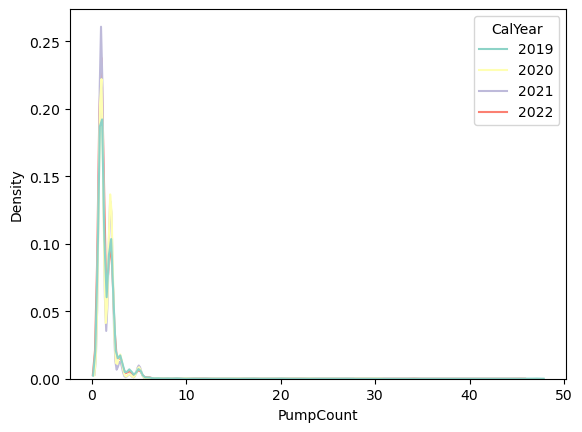

In [22]:
sns.kdeplot(data=df, x="PumpCount", palette="Set3", hue="CalYear");

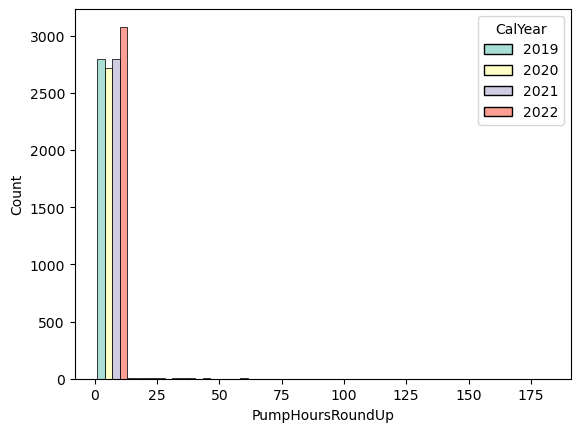

In [23]:
sns.histplot(data=df, x="PumpHoursRoundUp", palette="Set3", hue="CalYear", multiple="dodge");

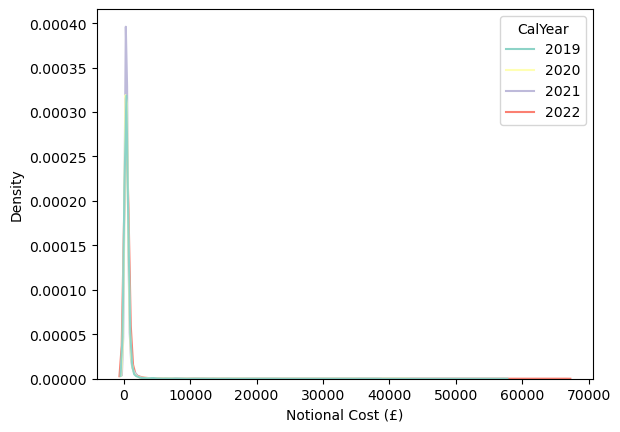

In [24]:
sns.kdeplot(data=df, x="Notional Cost (£)", palette="Set3", hue="CalYear");

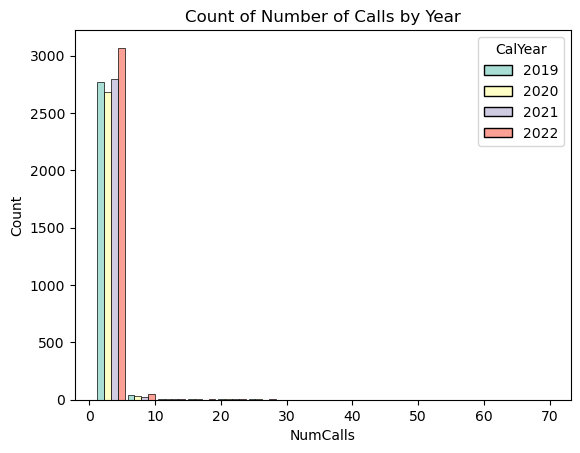

In [25]:
sns.histplot(data=df, x="NumCalls", palette="Set3", hue="CalYear",
             multiple="dodge", shrink=.9).set_title("Count of Number of Calls by Year");

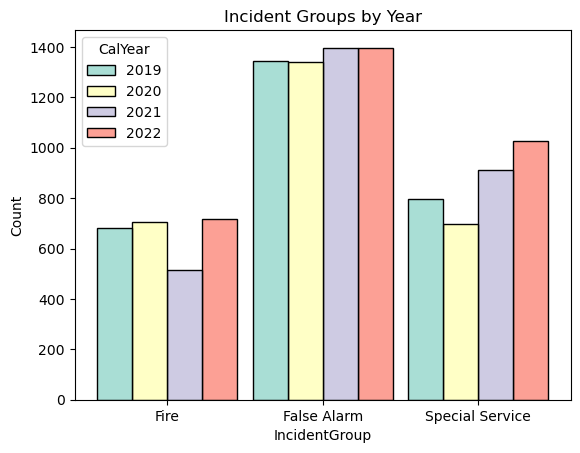

In [26]:
sns.histplot(data=df, x="IncidentGroup", palette="Set3", hue="CalYear",
             multiple="dodge", shrink=.9).set_title("Incident Groups by Year");

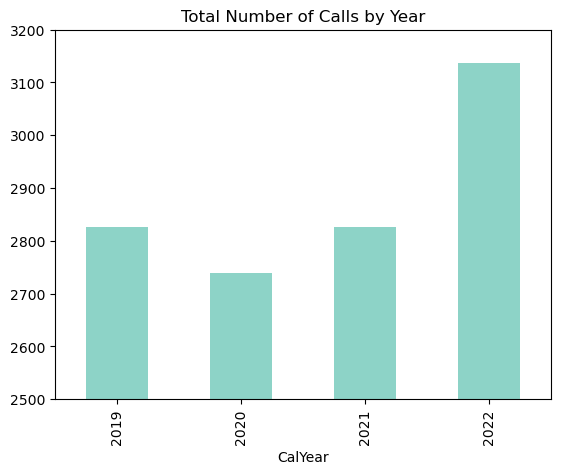

In [27]:
df['NumCalls'].groupby(df['CalYear']
                     ).agg('count'
                     ).plot(kind='bar', cmap="Set3", ylim=[2500,3200]
                     ).set_title("Total Number of Calls by Year"
                     );

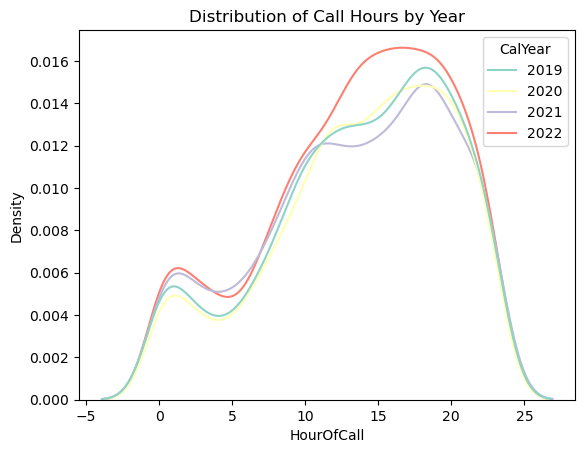

In [28]:
sns.kdeplot(data=df, x="HourOfCall", 
            palette="Set3", hue="CalYear"
           ).set_title("Distribution of Call Hours by Year");

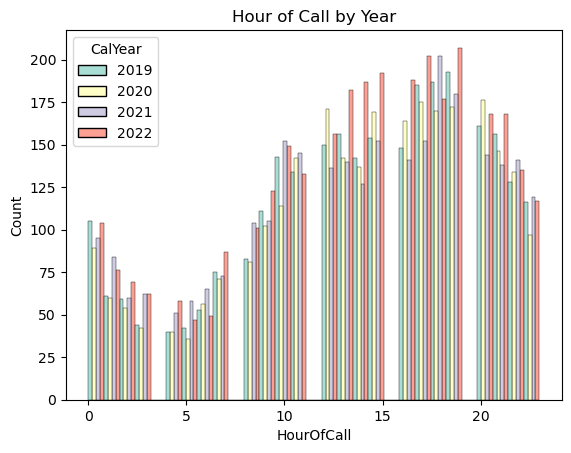

In [29]:
sns.histplot(x=df["HourOfCall"], hue=df["CalYear"], 
             palette="Set3", multiple="dodge"
            ).set_title("Hour of Call by Year");


## 2 – Frequency of out of borough attendance 

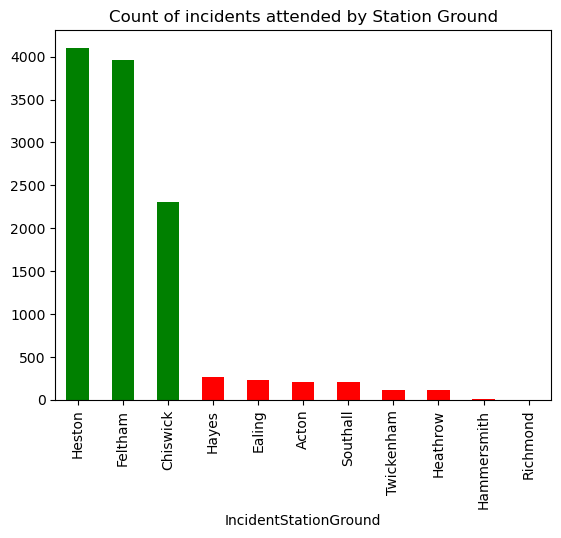

In [30]:
# set the in borough list of stations for future use
Borough_Stations = ['Heston','Feltham','Chiswick']

colours = ['green','green','green', 'red','red','red','red','red','red','red', ]

# Plot the chart
df_categorical["IncidentStationGround"].value_counts().plot(
    kind='bar', color=colours).set_title("Count of incidents attended by Station Ground");

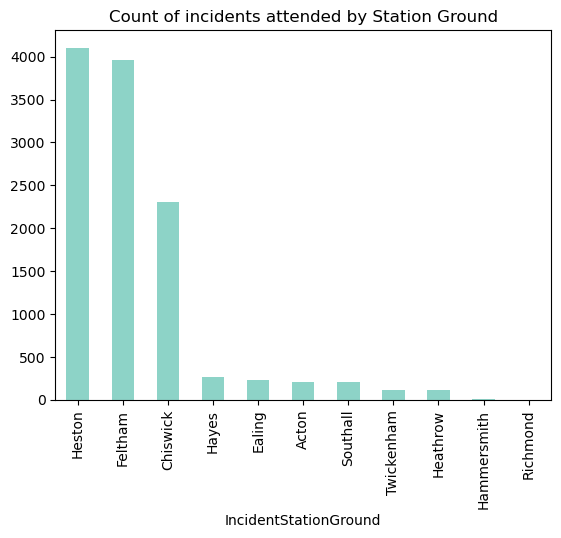

In [31]:
df_categorical["IncidentStationGround"].value_counts().plot(
    kind='bar', cmap="Set3").set_title("Count of incidents attended by Station Ground");

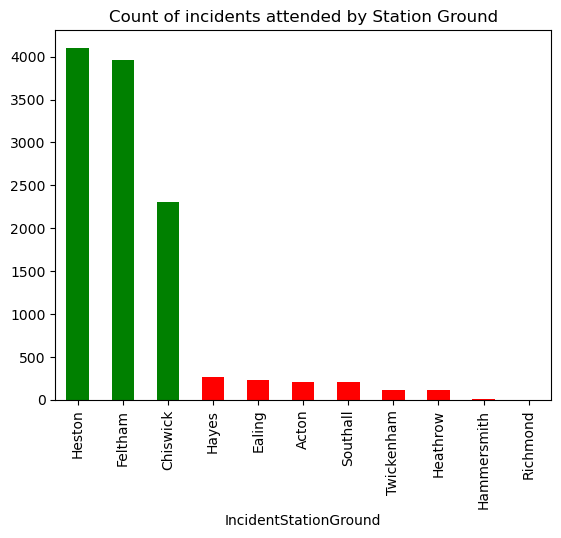

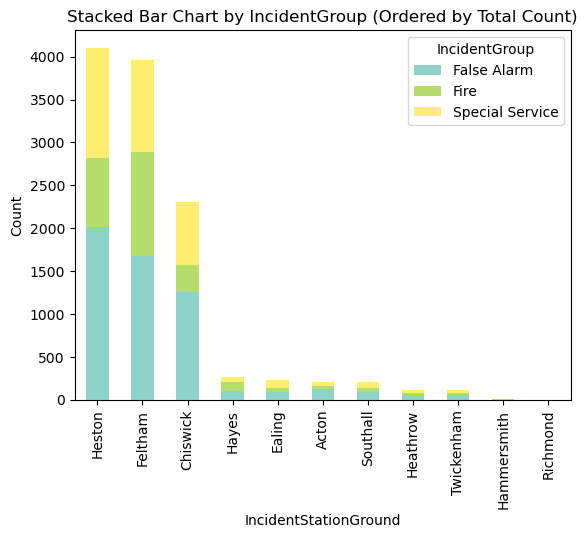

In [32]:
# now with the in borough bars highlighted
colours = ['green','green','green', 'red','red','red','red','red','red','red', ]

# Plot the chart
df_categorical["IncidentStationGround"].value_counts(
).plot(kind='bar', color=colours).set_title("Count of incidents attended by Station Ground")

# Create a stacked bar chart
station_group_counts = df_categorical.groupby(['IncidentStationGround', 'IncidentGroup']).size().unstack(fill_value=0)

# Sort by the total count (sum of values for each station)
sorted_stations = station_group_counts.sum(axis=1).sort_values(ascending=False).index

# Create a stacked bar chart with sorted stations
ax = station_group_counts.loc[sorted_stations].plot(kind='bar', stacked=True, cmap="Set3")
ax.set_title("Stacked Bar Chart by IncidentGroup (Ordered by Total Count)")
ax.set_xlabel("IncidentStationGround")
ax.set_ylabel("Count")
plt.show();

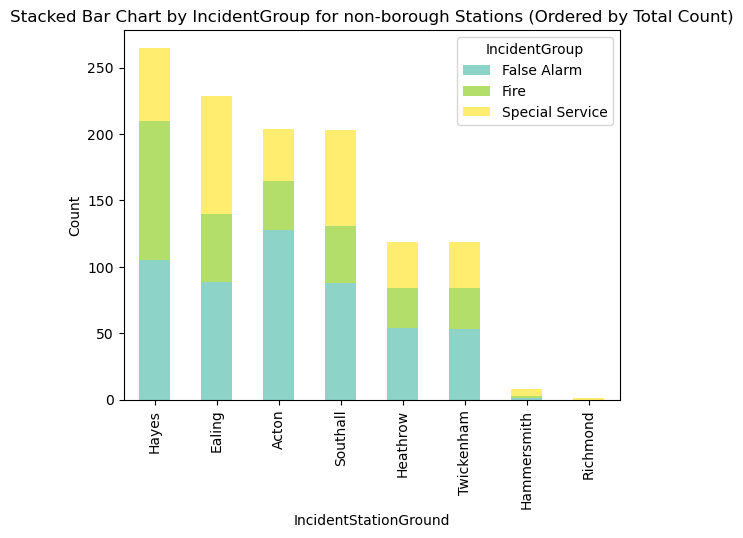

In [33]:
# drop the borough stations to get a better view of what out of borough pumps are turning up to
df_non_borough = df_categorical[~df_categorical["IncidentStationGround"].isin(Borough_Stations)]

# Calculate value counts for each station and group
non_borough_station_group_counts = df_non_borough.groupby(
    ['IncidentStationGround', 'IncidentGroup']).size().unstack(fill_value=0)

# Sort by the total count (sum of values for each station)
non_borough_sorted_stations = non_borough_station_group_counts.sum(axis=1).sort_values(ascending=False).index

# Create a stacked bar chart with sorted stations
ax = non_borough_station_group_counts.loc[non_borough_sorted_stations].plot(kind='bar', stacked=True, cmap="Set3")
ax.set_title("Stacked Bar Chart by IncidentGroup for non-borough Stations (Ordered by Total Count)")
ax.set_xlabel("IncidentStationGround")
ax.set_ylabel("Count")
plt.show();

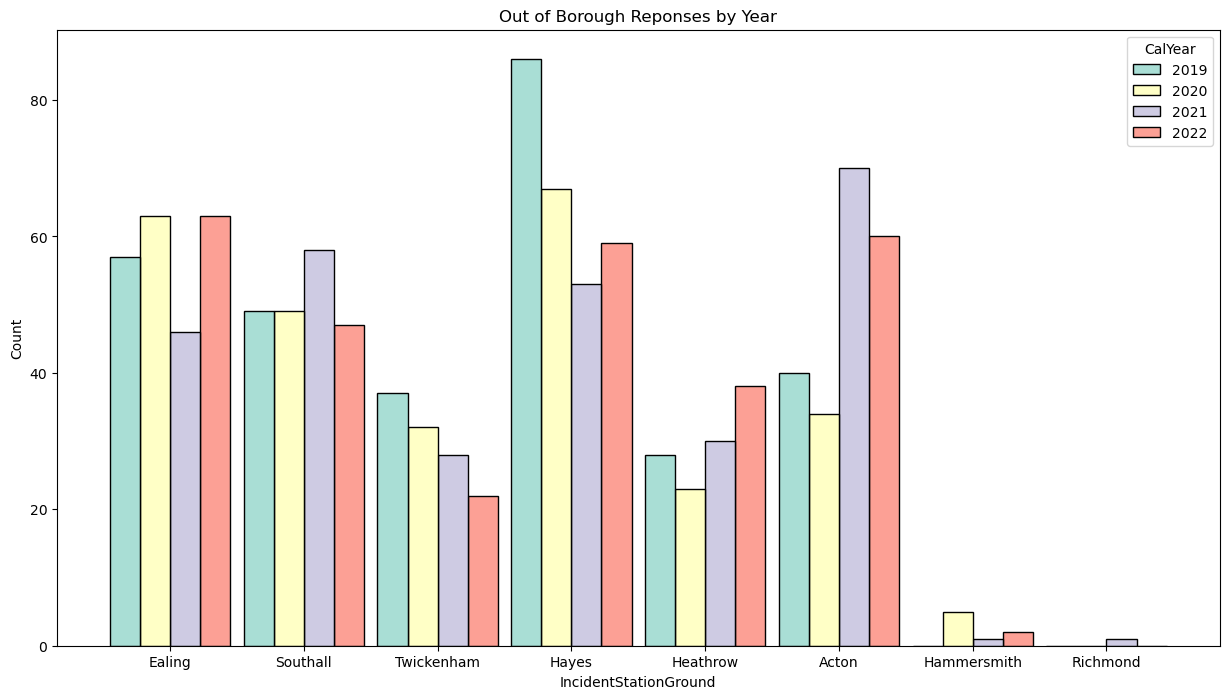

In [34]:
# Create a chart to show year on year changes
# pass dataframe filtered to only include the non-borough stations

plt.figure(figsize=(15,8))
sns.histplot(data=df[~df["IncidentStationGround"].isin(Borough_Stations)],
             x="IncidentStationGround", 
             palette="Set3", 
             hue="CalYear", 
             multiple="dodge", 
             shrink=.9).set(
    title="Out of Borough Reponses by Year");

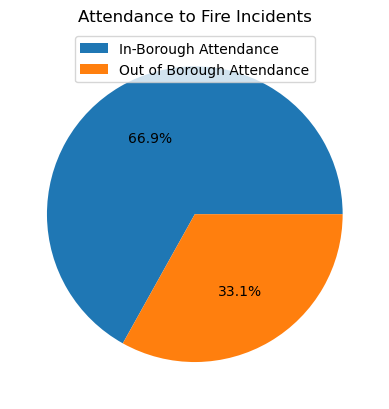

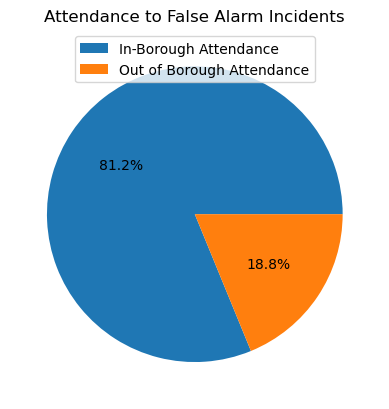

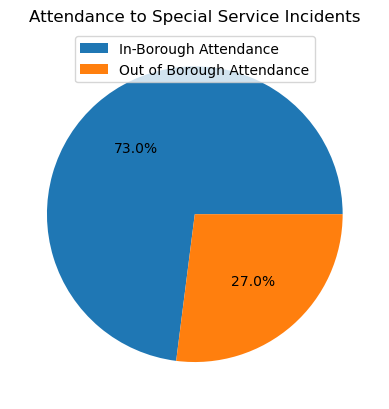

In [35]:
IncidentType = ["Fire", "False Alarm","Special Service"]

for incident in IncidentType:
    # create an in borough dataframe for the incident type above
    df_borough = df_categorical[df_categorical["IncidentStationGround"].isin(Borough_Stations) & 
                                df_categorical["IncidentGroup"].isin([incident])]

    # plot for the above incident type
    labels = ["In-Borough Attendance", "Out of Borough Attendance"]
    in_borough = df_borough["IncidentGroup"].count()
    out_borough = df_non_borough["IncidentGroup"].count()
    values = [in_borough, out_borough]

    fig, ax = plt.subplots()
    ax.pie(values,  autopct = '%1.1f%%')
    ax.legend(labels = labels, loc='upper center')
    # Fix this...
    ax.set_title("Attendance to " + incident + " Incidents");
    plt.show();


## 3 – Incident location hotspots

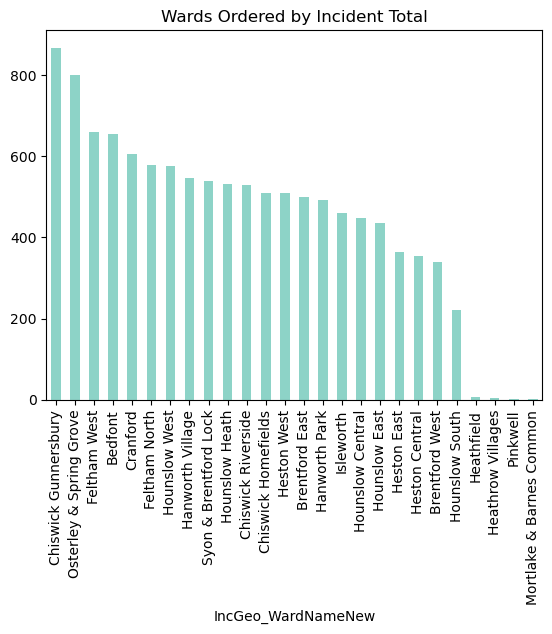

In [36]:
df_categorical["IncGeo_WardNameNew"]
# all
df_categorical["IncGeo_WardNameNew"].str.title().value_counts().plot(
    kind='bar', cmap="Set3").set_title("Wards Ordered by Incident Total");

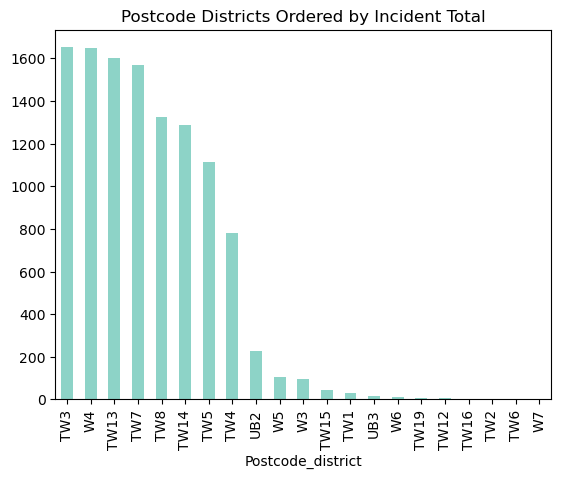

In [37]:
# all
df["Postcode_district"].value_counts().plot(
    kind='bar', cmap="Set3").set_title("Postcode Districts Ordered by Incident Total");

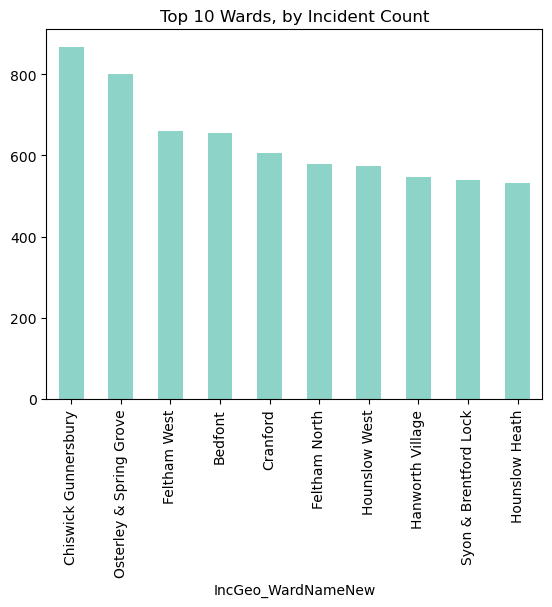

In [38]:
# top 10
df_categorical["IncGeo_WardNameNew"].str.title(
).value_counts().nlargest(10).plot(kind='bar', cmap="Set3").set_title("Top 10 Wards, by Incident Count");

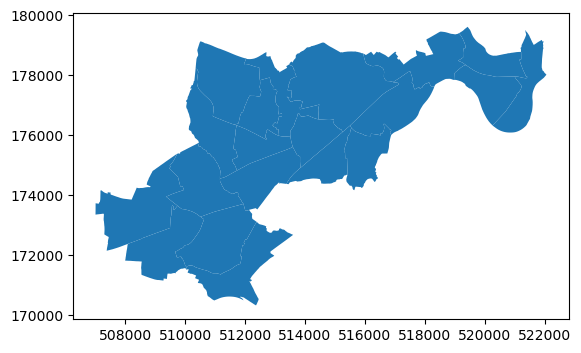

In [39]:
import geopandas as gpd
# load in a shapefile
wards_df = gpd.read_file(r'C:\Users\tj290\OneDrive - London South Bank University\Masters\Data Mining\CW1\notebooks\London-wards-2018\London-wards-2018_ESRI\London_Ward.shp')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
wards_df.head()

# take only Hounslow wards
wards_df = wards_df.loc[wards_df['DISTRICT'] == 'Hounslow']
wards_df.plot();

In [40]:
# get the data to join to the map dataframe
map_data_incidents = df["IncGeo_WardName"].str.title().value_counts()
# convert into dataframe
map_data_df = map_data_incidents.to_frame() 
map_data_df

,count
IncGeo_WardName,
Chiswick Gunnersbury,867
Osterley & Spring Grove,800
Feltham West,659
Bedfont,654
Cranford,606
Feltham North,579
Hounslow West,575
Hanworth Village,547
Syon & Brentford Lock,539


In [41]:
map_merged = wards_df.set_index('NAME').join(map_data_df)
map_merged.head()

,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,count
NAME,,,,,,,
Bedfont,E05000346,Hounslow,E09000018,444.841,0.000,"POLYGON ((508084.300 172367.100, 507949.897 17...",654.0
Hanworth,E05000353,Hounslow,E09000018,323.258,0.000,"POLYGON ((510073.899 171627.102, 510085.904 17...",NaN
Cranford,E05000350,Hounslow,E09000018,272.630,0.000,"POLYGON ((510346.596 178212.297, 510365.296 17...",606.0
Syon,E05000364,Hounslow,E09000018,285.378,13.187,"POLYGON ((515506.397 176321.798, 515568.202 17...",NaN
Heston West,E05000357,Hounslow,E09000018,382.657,0.000,"POLYGON ((511637.303 176354.498, 511635.398 17...",508.0


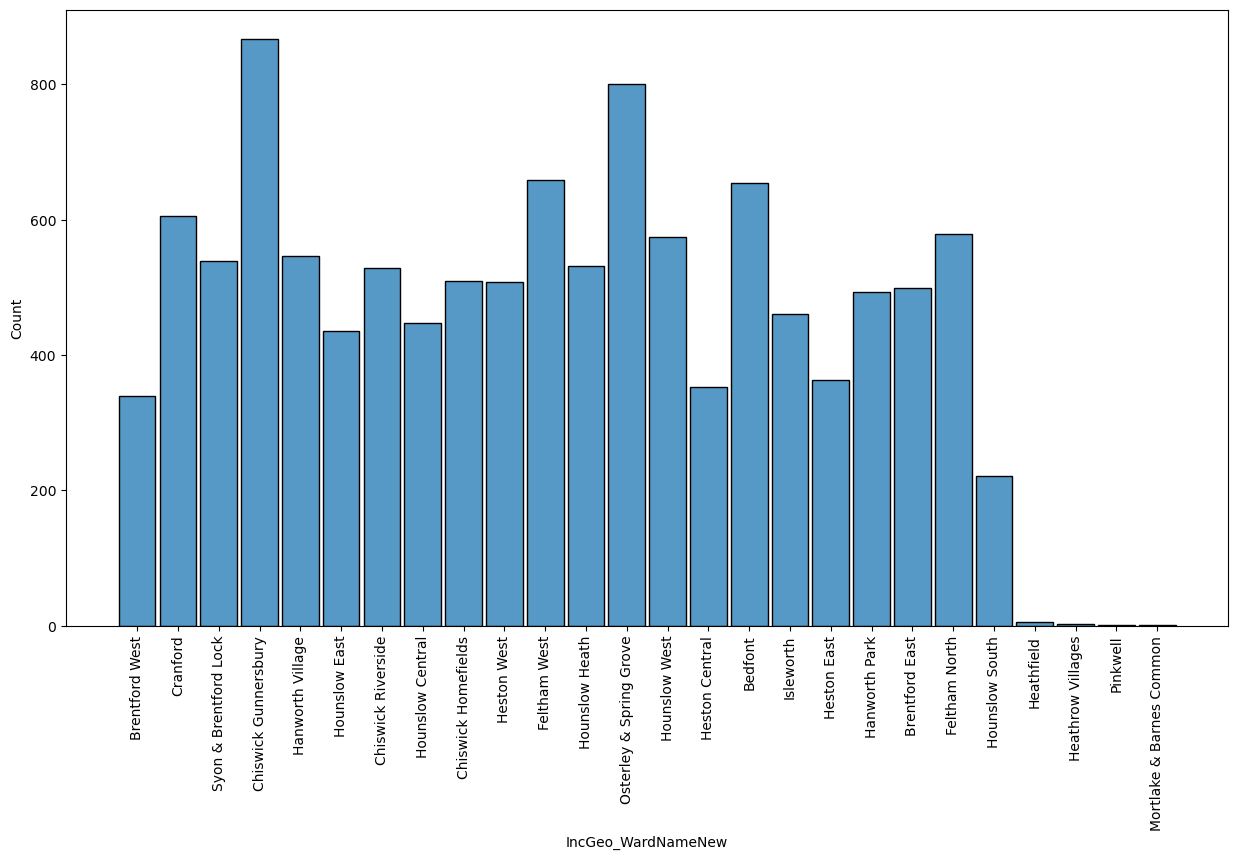

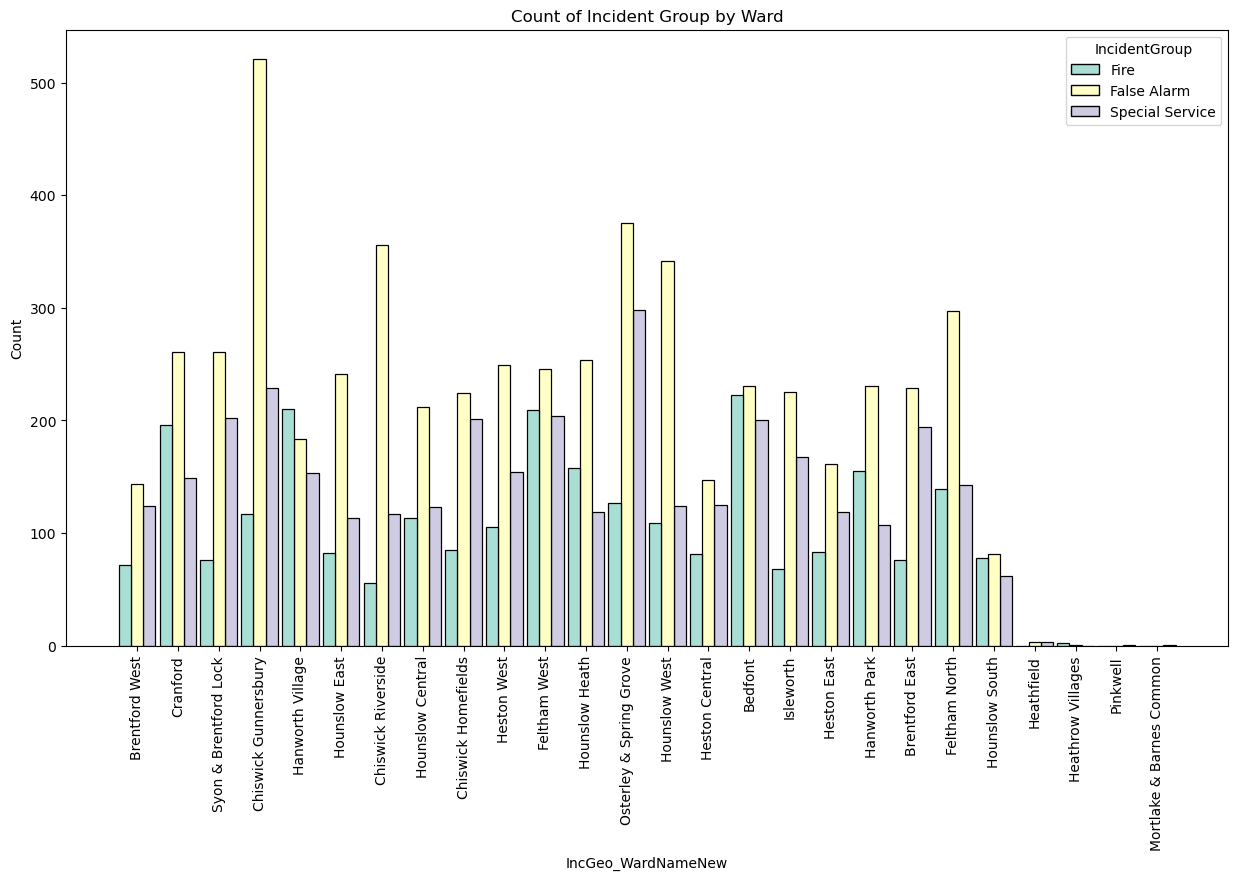

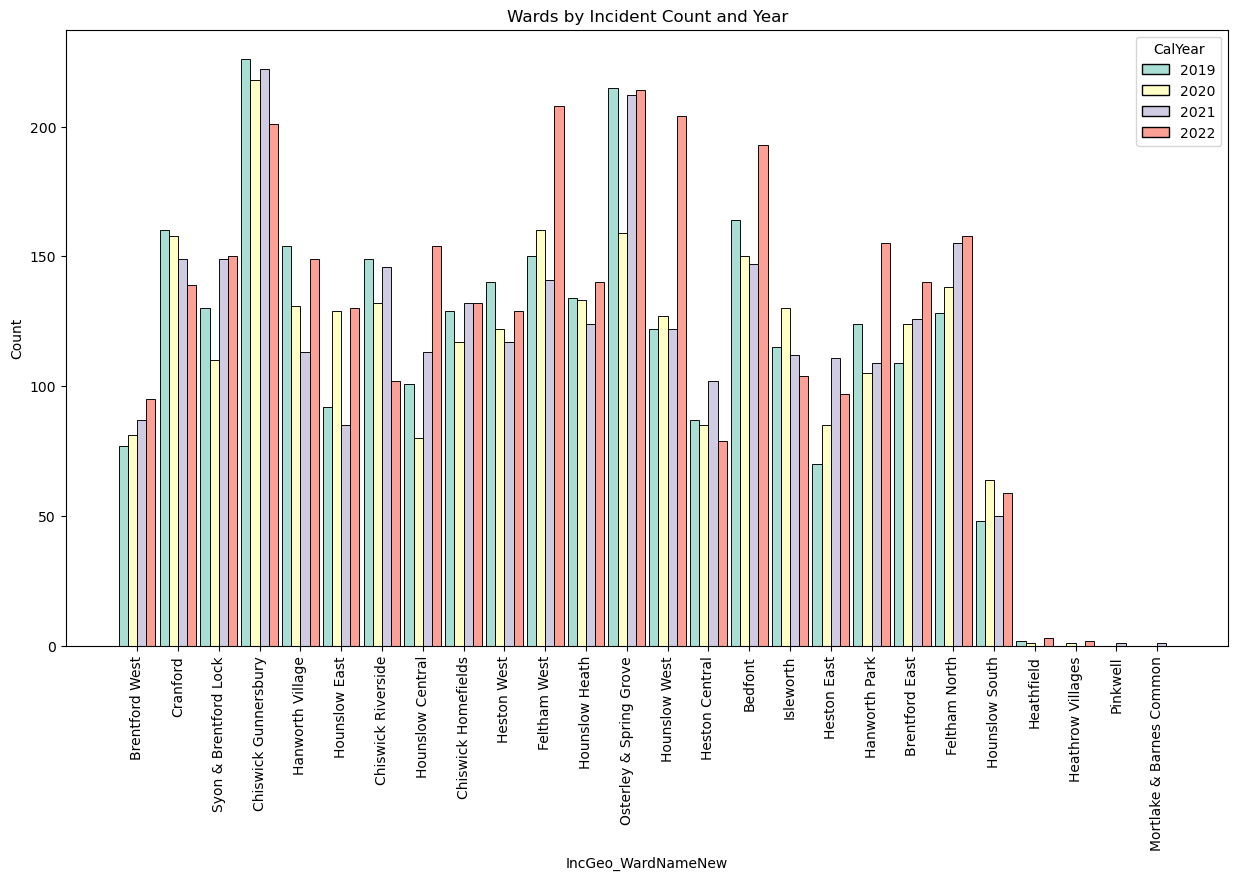

In [42]:
plt.figure(figsize=(15,8))
plot = sns.histplot(data=df, x=df_categorical["IncGeo_WardNameNew"].str.title(),  
             palette="Set3", shrink=.9);
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

plt.figure(figsize=(15,8))
plot = sns.histplot(data=df, x=df_categorical["IncGeo_WardNameNew"].str.title(),  
             palette="Set3", hue="IncidentGroup", multiple="dodge",shrink=.9);
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title("Count of Incident Group by Ward");

plt.figure(figsize=(15,8))
plot = sns.histplot(data=df, x=df_categorical["IncGeo_WardNameNew"].str.title(),  
             palette="Set3", hue="CalYear", multiple="dodge", shrink=.9)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title("Wards by Incident Count and Year");


## 4 – Factors that predict a false alarm

In [43]:
# Import packages (libraries)

from sklearn import tree # import package tree
from sklearn.model_selection import train_test_split # Data splitting for tranining and testing
from sklearn.tree import DecisionTreeClassifier # Create a decision tree classifier
from sklearn.metrics import accuracy_score # Calculate the accuracy of a classifier
from sklearn.metrics import confusion_matrix # Produce the confusion matrix of a classfiier
from sklearn.tree import plot_tree # Plot a decision tree
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

import graphviz # Visualisae decision tree

#import pydotplus #
#from dtreeviz.trees import dtreeviz

df_dTree = df[['HourOfCall','PropertyCategory', 'PropertyType', 
       'Easting_rounded', 'Northing_rounded', 'NumCalls']].copy()
df_dTree

# fix currently numeric categorical variables
df_dTree.HourOfCall = df_dTree.HourOfCall.astype('str')
df_dTree.Easting_rounded = df_dTree.Easting_rounded.astype('str')
df_dTree.Northing_rounded = df_dTree.Northing_rounded.astype('str')

# one-hot encode
df_dt_oh = pd.get_dummies(df_dTree)
df_dt_oh

,NumCalls,HourOfCall_0,HourOfCall_1,HourOfCall_10,HourOfCall_11,HourOfCall_12,HourOfCall_13,HourOfCall_14,HourOfCall_15,HourOfCall_16,...,Northing_rounded_178650,Northing_rounded_178750,Northing_rounded_178850,Northing_rounded_178950,Northing_rounded_179050,Northing_rounded_179150,Northing_rounded_179250,Northing_rounded_179350,Northing_rounded_179450,Northing_rounded_179550
0,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524,2,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11525,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11526,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11527,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# Target column is IncidentGroup - target is 'False Alarm'
my_data = df_reduced

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
my_data['EncodedIncidentGroup']=le.fit_transform(my_data.IncidentGroup)
my_data['EncodedIncidentGroup']
# 1 = Fire, 0 = False Alarm, 2 = Special Service
# now replace special service with 1 so we have 1 = alarm and 0 = false alarm
my_data['EncodedIncidentGroup'].replace(2, 1, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_dt_oh, my_data[['EncodedIncidentGroup']], test_size=0.2)

# address the class imbalance with SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [45]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 24,
            max_depth = 4, min_samples_leaf = 1)
model = clf.fit(X_train_res, y_train_res)

text_representation = tree.export_text(clf, feature_names=X_train_res.columns)
print(text_representation) 


|--- PropertyCategory_Non Residential <= 0.50
|   |--- PropertyCategory_Other Residential <= 0.50
|   |   |--- PropertyCategory_Dwelling <= 0.50
|   |   |   |--- PropertyCategory_Outdoor <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- PropertyCategory_Outdoor >  0.50
|   |   |   |   |--- class: 1
|   |   |--- PropertyCategory_Dwelling >  0.50
|   |   |   |--- PropertyType_Self contained Sheltered Housing  <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- PropertyType_Self contained Sheltered Housing  >  0.50
|   |   |   |   |--- class: 0
|   |--- PropertyCategory_Other Residential >  0.50
|   |   |--- PropertyType_Retirement/Old Persons Home <= 0.50
|   |   |   |--- Northing_rounded_173650 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Northing_rounded_173650 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- PropertyType_Retirement/Old Persons Home >  0.50
|   |   |   |--- HourOfCall_7 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- HourOfCall_7 >  0.50
|   

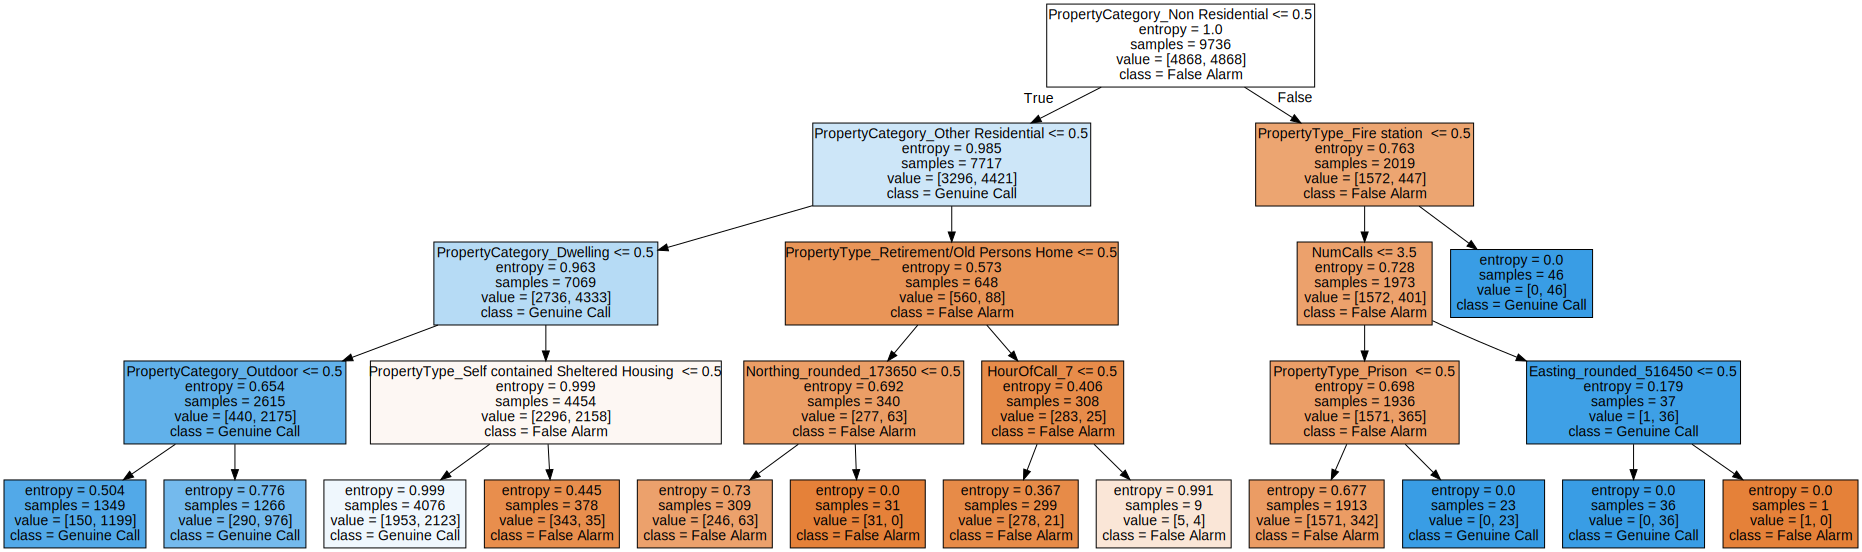

In [46]:
class_names = ['False Alarm', 'Genuine Call'] 
feature_names = X_train_res.columns

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,
                                filled=True)

# Draw DT graph
graph = graphviz.Source(dot_data, format="png") 
graph

# graph.render('DecisionTree_') # Export graph

# The left branch of a node indicates Ture of the test that the node is involved, e.g. If Income<=29.0 in the root node.
# At the bottom of each box, 'class=*' indicates the mojority of the samples from class *
# Value[ , ] indicates how many samples from each class in a node.


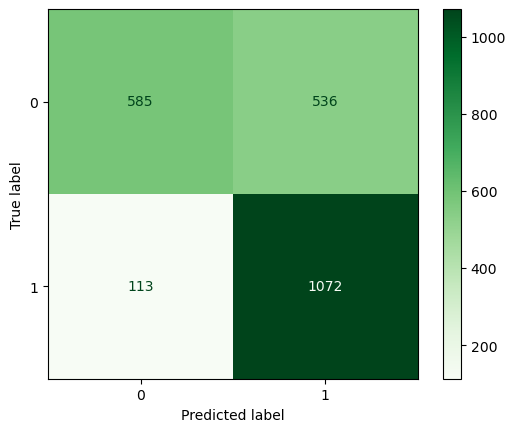

In [47]:
# Generate confiusion matrix for the classifier. 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

# Plot the confusion matrix in graph
confusion_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)
disp.plot(cmap='Greens')
# showing the matrix
plt.show();


In [48]:
#metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print("Accuracy: ", round(accuracy_score(y_test,y_pred), 4))
print("Precision: ", round(precision_score(y_test,y_pred), 4))
print("Recall: ", round(recall_score(y_test,y_pred), 4))
print("F1 Score: ", round(f1_score(y_test,y_pred), 4))


Accuracy:  0.7186
Precision:  0.6667
Recall:  0.9046
F1 Score:  0.7676


### KNN Regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# use the same set of variables as the Decision Tree
df_knn = df[['HourOfCall',       
       'PropertyCategory', 'PropertyType', 'Easting_rounded', 'Northing_rounded', 'NumCalls']].copy()

# one-hot encode
df_knn_oh = pd.get_dummies(df_knn)

df_knn_target= df[['IncidentGroup']]
le=LabelEncoder()
df_knn_target['EncodedIncidentGroup']=le.fit_transform(df_knn_target.IncidentGroup)
df_knn_target['EncodedIncidentGroup']
# 1 = Fire, 0 = False Alarm, 2 = Special Service
# now replace special service with 1 so we have 1 = alarm and 0 = false alarm
df_knn_target['EncodedIncidentGroup'].replace(2, 1, inplace=True)
df_knn_target = df_knn_target.drop(['IncidentGroup'], axis=1)

df_knn_target
df_knn_oh


,HourOfCall,Easting_rounded,Northing_rounded,NumCalls,PropertyCategory_Boat,PropertyCategory_Dwelling,PropertyCategory_Non Residential,PropertyCategory_Other Residential,PropertyCategory_Outdoor,PropertyCategory_Outdoor Structure,...,PropertyType_Vehicle sales building,PropertyType_Veterinary surgery,PropertyType_Warehouse,PropertyType_Wasteland,PropertyType_Water works,PropertyType_Wheelie bin (domestic size),PropertyType_Woodland/forest - broadleaf/hardwood,PropertyType_Woodland/forest - conifers/softwood,PropertyType_Young offenders unit,PropertyType_Youth hostel
0,0,517750,178350,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,510850,177550,1,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,1,516250,176650,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,6,520750,177950,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,512250,172850,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524,13,515950,176850,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11525,17,513550,175350,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11526,18,519150,178050,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11527,18,510650,174650,3,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [50]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_knn_oh, df_knn_target, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# address the class imbalance with SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7194275802254987


KNeighborsClassifier(n_neighbors=9)

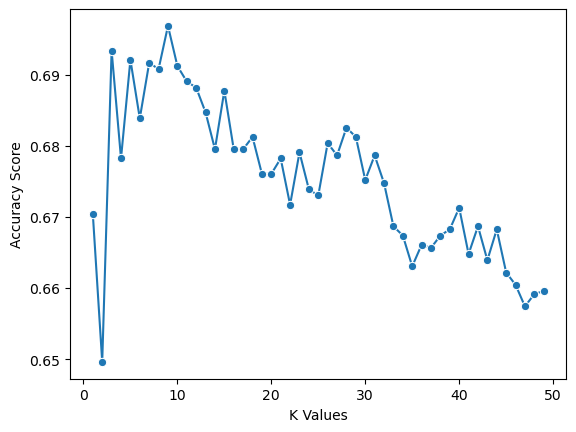

In [52]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,50)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_test)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y_test, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_res, y_train_res)

In [53]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", round(accuracy_score(y_test,y_pred), 4))
print("Precision: ", round(precision_score(y_test,y_pred), 4))
print("Recall: ", round(recall_score(y_test,y_pred), 4))
print("F1 Score: ", round(f1_score(y_test,y_pred), 4))

Accuracy:  0.7199
Precision:  0.7336
Recall:  0.7312
F1 Score:  0.7324


## 5 – Factors most associated with fires within dwellings

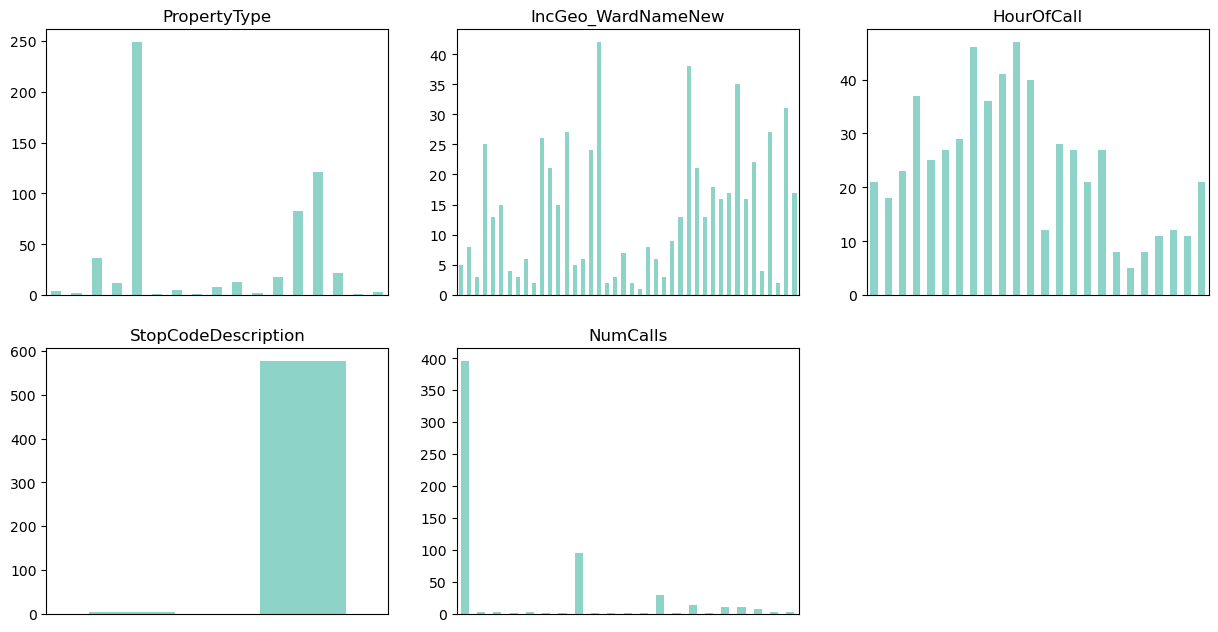

In [54]:
#use only fire incidents in dwellings
fire_df = df.loc[df["IncidentGroup"] == "Fire" ]
dwelling_fire_df = fire_df.loc[fire_df["PropertyCategory"] == "Dwelling" ]

# Select the attributes to be used for association analysis
assoc_df = dwelling_fire_df[['PropertyType','IncGeo_WardNameNew', 'HourOfCall', 'StopCodeDescription', 'NumCalls']].astype('str')
assoc_df.head()

# check the data quality of the above sub-set:
fig = plt.figure(figsize=(15,20))

for i in range(len(assoc_df.columns)):
    column = assoc_df.columns[i]
    sub = fig.add_subplot(5,3, i+1)
    chart = assoc_df[column].value_counts().sort_index(axis=0).plot(kind="bar", cmap="Set3").set_title(column)
    plt.xlabel('') # remove the label
    plt.xticks([]) # remove the ticks
# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2);

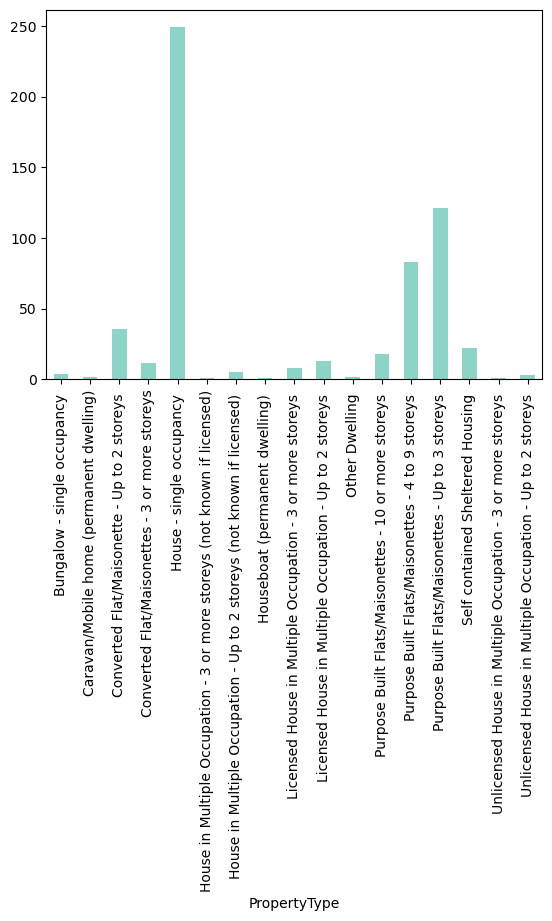

In [55]:
assoc_df["PropertyType"].value_counts().sort_index(axis=0).plot(kind="bar", cmap="Set3");

In [56]:
# one-hot encode
one_hot = pd.get_dummies(assoc_df)
one_hot

,PropertyType_Bungalow - single occupancy,PropertyType_Caravan/Mobile home (permanent dwelling),PropertyType_Converted Flat/Maisonette - Up to 2 storeys,PropertyType_Converted Flat/Maisonettes - 3 or more storeys,PropertyType_House - single occupancy,PropertyType_House in Multiple Occupation - 3 or more storeys (not known if licensed),PropertyType_House in Multiple Occupation - Up to 2 storeys (not known if licensed),PropertyType_Houseboat (permanent dwelling),PropertyType_Licensed House in Multiple Occupation - 3 or more storeys,PropertyType_Licensed House in Multiple Occupation - Up to 2 storeys,...,NumCalls_28,NumCalls_3,NumCalls_32,NumCalls_4,NumCalls_44,NumCalls_5,NumCalls_6,NumCalls_7,NumCalls_8,NumCalls_9
13,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11498,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11500,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
# Apriori: identify freq item and use them to form rules
from mlxtend.frequent_patterns import apriori, association_rules 
data = one_hot
freq_item = apriori(data, min_support = 0.2, use_colnames = True, verbose = 1)
freq_item

Processing 6 combinations | Sampling itemset size 3


,support,itemsets
0,0.428571,(PropertyType_House - single occupancy )
1,0.208262,(PropertyType_Purpose Built Flats/Maisonettes ...
2,0.994836,(StopCodeDescription_Primary Fire)
3,0.681583,(NumCalls_1)
4,0.423408,"(StopCodeDescription_Primary Fire, PropertyTyp..."
5,0.296041,"(NumCalls_1, PropertyType_House - single occup..."
6,0.208262,(PropertyType_Purpose Built Flats/Maisonettes ...
7,0.678141,"(NumCalls_1, StopCodeDescription_Primary Fire)"
8,0.292599,"(NumCalls_1, StopCodeDescription_Primary Fire,..."


In [58]:
# the rules
association_rule = association_rules(freq_item, metric = "confidence", min_threshold = 0.5)
association_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PropertyType_House - single occupancy ),(StopCodeDescription_Primary Fire),0.428571,0.994836,0.423408,0.987952,0.993080,-0.002951,0.428571,-0.012048
1,(PropertyType_House - single occupancy ),(NumCalls_1),0.428571,0.681583,0.296041,0.690763,1.013468,0.003934,1.029685,0.023256
2,(PropertyType_Purpose Built Flats/Maisonettes ...,(StopCodeDescription_Primary Fire),0.208262,0.994836,0.208262,1.000000,1.005190,0.001075,inf,0.006522
3,(NumCalls_1),(StopCodeDescription_Primary Fire),0.681583,0.994836,0.678141,0.994949,1.000114,0.000077,1.022375,0.000357
4,(StopCodeDescription_Primary Fire),(NumCalls_1),0.994836,0.681583,0.678141,0.681661,1.000114,0.000077,1.000243,0.021997
5,"(NumCalls_1, PropertyType_House - single occup...",(StopCodeDescription_Primary Fire),0.296041,0.994836,0.292599,0.988372,0.993502,-0.001914,0.444062,-0.009205
6,"(StopCodeDescription_Primary Fire, PropertyTyp...",(NumCalls_1),0.423408,0.681583,0.292599,0.691057,1.013899,0.004011,1.030664,0.023775
7,(PropertyType_House - single occupancy ),"(NumCalls_1, StopCodeDescription_Primary Fire)",0.428571,0.678141,0.292599,0.682731,1.006768,0.001967,1.014467,0.011765
